# AUTOMATED DATA ANALYSIS REPORT

*File:* `TectonicEvents_PowerBI.xlsx`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Load data
df = pd.read_excel('C:/Users/GHULAM MUSTAFA/Downloads/TectonicEvents_PowerBI.xlsx')

In [4]:
# BASIC DATA INSPECTION
print('\n=== First 5 Rows ===')
display(df.head())
print('\n=== Dataset Info ===')
display(df.info())
print('\n=== Descriptive Statistics ===')
display(df.describe(include='all'))

# MISSING VALUE ANALYSIS
missing_values = df.isnull().sum()
missing_pct = (df.isnull().mean() * 100).round(2)
missing_df = pd.concat([missing_values, missing_pct], axis=1)
missing_df.columns = ['Missing Count', 'Missing %']
missing_df = missing_df[missing_df['Missing Count'] > 0]
if not missing_df.empty:
    print('\n=== Columns with Missing Values ===')
    display(missing_df.sort_values('Missing %', ascending=False))
else:
    print('\nNo missing values found in any columns.')

# NUMERIC COLUMNS ANALYSIS
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f'\nFound {len(numeric_cols)} numeric columns')
for col in numeric_cols:
    print(f'\n--- {col} ---')
    print(f'Mean: {df[col].mean():.2f} | Median: {df[col].median():.2f}')
    print(f'Std: {df[col].std():.2f} | Range: {df[col].min():.2f}-{df[col].max():.2f}')
    print(f'Skew: {df[col].skew():.2f} | Kurtosis: {df[col].kurtosis():.2f}')

# CATEGORICAL COLUMNS ANALYSIS
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'\nFound {len(cat_cols)} categorical columns')
for col in cat_cols:
    print(f'\n--- {col} ---')
    print(f'Unique values: {df[col].nunique()}')
    if df[col].nunique() < 15:
        display(df[col].value_counts(dropna=False).to_frame('Count').style.bar(color='#d65f5f'))


=== First 5 Rows ===


,event_id,continent,country,region,latitude,longitude,event_type,depth_km,magnitude,plate_involved_1,plate_involved_2,movement_type,velocity_mm_per_year,date_observed
0,EVT20130128_0000,Australia,China,Region_49,20.715,-42.740,Subduction Zone,586.830,7.900,Eurasian Plate,North American Plate,Divergent,9.010,2013-01-28
1,EVT20160217_0001,Australia,Indonesia,Region_3,-83.998,56.068,Delamination,519.880,9.200,Arabian Plate,African Plate,Divergent,58.630,2016-02-17
2,EVT20000514_0002,Antarctica,India,Region_43,80.345,-43.096,Transform Fault,61.740,4.400,Eurasian Plate,Indian Plate,Divergent,53.830,2000-05-14
3,EVT20060220_0003,Africa,Turkey,Region_27,-65.987,40.988,Delamination,307.820,7.200,Pacific Plate,African Plate,Convergent,48.250,2006-02-20
4,EVT20190824_0004,North America,USA,Region_37,16.464,-8.106,Delamination,125.840,6.800,Arabian Plate,Eurasian Plate,Transform,95.990,2019-08-24



=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   event_id              1000 non-null   object 
 1   continent             1000 non-null   object 
 2   country               1000 non-null   object 
 3   region                1000 non-null   object 
 4   latitude              1000 non-null   float64
 5   longitude             1000 non-null   float64
 6   event_type            1000 non-null   object 
 7   depth_km              1000 non-null   float64
 8   magnitude             1000 non-null   float64
 9   plate_involved_1      1000 non-null   object 
 10  plate_involved_2      1000 non-null   object 
 11  movement_type         1000 non-null   object 
 12  velocity_mm_per_year  1000 non-null   float64
 13  date_observed         1000 non-null   object 
dtypes: float64(5), object(9)
memory usage: 109.5+ KB


None


=== Descriptive Statistics ===


,event_id,continent,country,region,latitude,longitude,event_type,depth_km,magnitude,plate_involved_1,plate_involved_2,movement_type,velocity_mm_per_year,date_observed
count,1000,1000,1000,1000,1000.000,1000.000,1000,1000.000,1000.000,1000,1000,1000,1000.000,1000
unique,1000,7,8,100,NaN,NaN,5,NaN,NaN,6,6,3,NaN,953
top,EVT20130128_0000,Australia,China,Region_60,NaN,NaN,Rift,NaN,NaN,North American Plate,African Plate,Divergent,NaN,2020-04-15
freq,1,163,143,20,NaN,NaN,210,NaN,NaN,190,179,359,NaN,3
mean,NaN,NaN,NaN,NaN,1.994,-1.957,NaN,345.733,6.751,NaN,NaN,NaN,52.954,NaN
std,NaN,NaN,NaN,NaN,52.148,102.803,NaN,202.845,1.628,NaN,NaN,NaN,26.708,NaN
min,NaN,NaN,NaN,NaN,-89.945,-179.792,NaN,5.090,4.000,NaN,NaN,NaN,5.140,NaN
25%,NaN,NaN,NaN,NaN,-43.004,-89.869,NaN,165.082,5.300,NaN,NaN,NaN,30.678,NaN
50%,NaN,NaN,NaN,NaN,4.164,-4.087,NaN,347.150,6.800,NaN,NaN,NaN,53.665,NaN
75%,NaN,NaN,NaN,NaN,48.047,84.309,NaN,519.077,8.200,NaN,NaN,NaN,74.855,NaN



No missing values found in any columns.

Found 5 numeric columns

--- latitude ---
Mean: 1.99 | Median: 4.16
Std: 52.15 | Range: -89.94-90.00
Skew: -0.07 | Kurtosis: -1.23

--- longitude ---
Mean: -1.96 | Median: -4.09
Std: 102.80 | Range: -179.79-179.69
Skew: 0.03 | Kurtosis: -1.18

--- depth_km ---
Mean: 345.73 | Median: 347.15
Std: 202.84 | Range: 5.09-699.67
Skew: 0.02 | Kurtosis: -1.24

--- magnitude ---
Mean: 6.75 | Median: 6.80
Std: 1.63 | Range: 4.00-9.50
Skew: 0.01 | Kurtosis: -1.20

--- velocity_mm_per_year ---
Mean: 52.95 | Median: 53.66
Std: 26.71 | Range: 5.14-99.92
Skew: -0.04 | Kurtosis: -1.14

Found 9 categorical columns

--- event_id ---
Unique values: 1000

--- continent ---
Unique values: 7


,Count
continent,
Australia,163
South America,149
Asia,146
North America,142
Europe,141
Antarctica,134
Africa,125



--- country ---
Unique values: 8


,Count
country,
China,143
Turkey,137
Indonesia,124
USA,124
Japan,124
India,117
Chile,117
Ethiopia,114



--- region ---
Unique values: 100

--- event_type ---
Unique values: 5


,Count
event_type,
Rift,210
Subduction Zone,209
Delamination,197
Convergent Zone,196
Transform Fault,188



--- plate_involved_1 ---
Unique values: 6


,Count
plate_involved_1,
North American Plate,190
Pacific Plate,168
Eurasian Plate,164
Arabian Plate,161
Indian Plate,159
African Plate,158



--- plate_involved_2 ---
Unique values: 6


,Count
plate_involved_2,
African Plate,179
Pacific Plate,174
North American Plate,168
Indian Plate,164
Arabian Plate,160
Eurasian Plate,155



--- movement_type ---
Unique values: 3


,Count
movement_type,
Divergent,359
Convergent,334
Transform,307



--- date_observed ---
Unique values: 953


In [5]:
# VISUALIZATION SETUP
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set()
sns.set_palette('husl')
if not os.path.exists('charts'):
    os.makedirs('charts')
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if df[col].nunique() < 15]


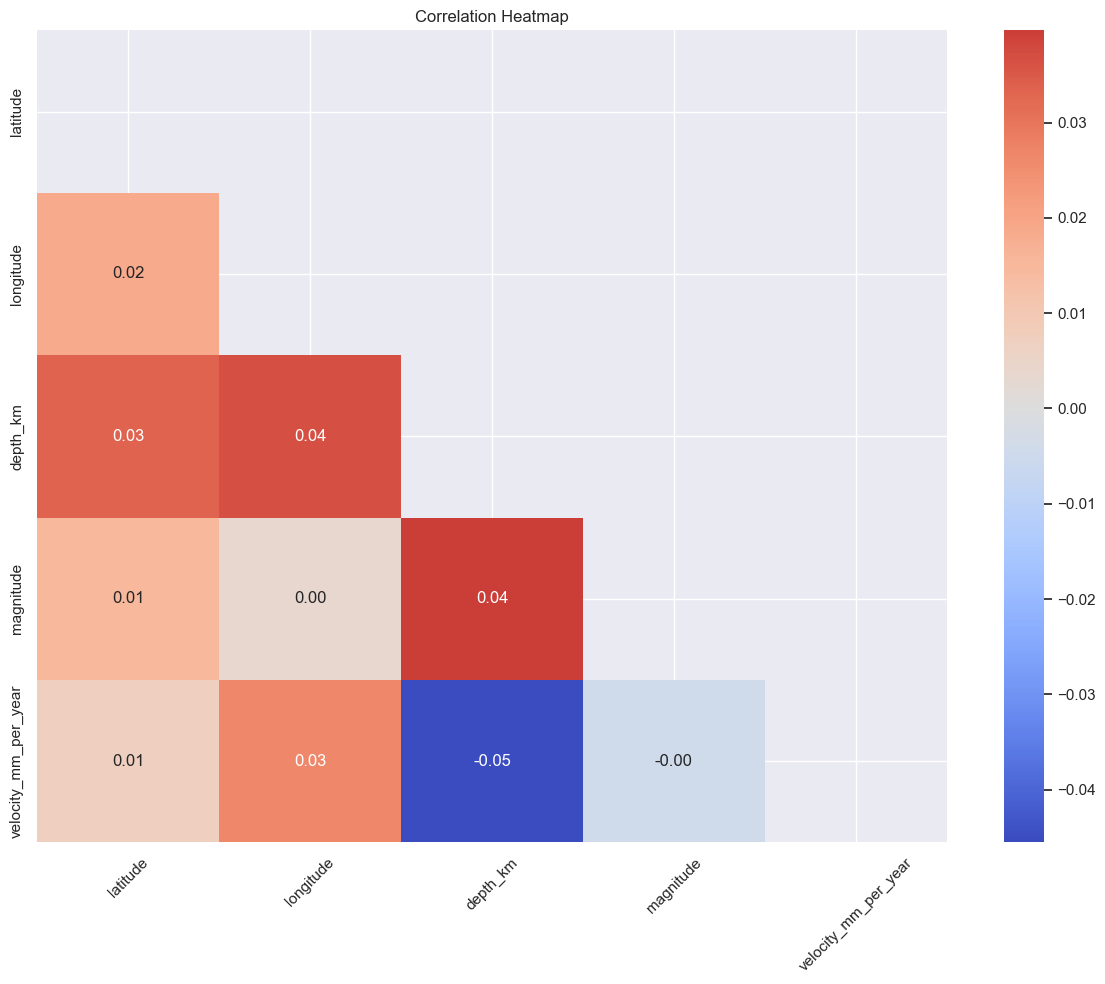

In [6]:

import numpy as np
plt.figure(figsize=(12,10))
corr = df[['latitude', 'longitude', 'depth_km', 'magnitude', 'velocity_mm_per_year']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('charts/correlation_heatmap.png', dpi=150)
plt.show()


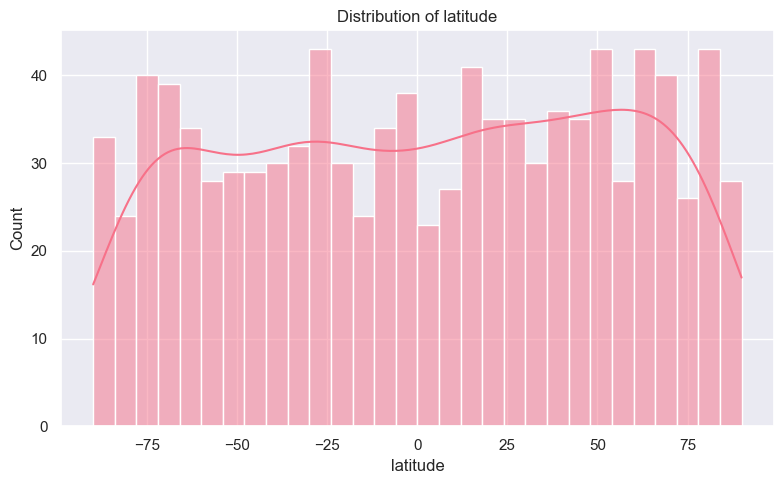

In [7]:

plt.figure(figsize=(8,5))
sns.histplot(df['latitude'], kde=True, bins=30)
plt.title('Distribution of latitude')
plt.tight_layout()
plt.savefig('charts/hist_latitude.png', dpi=150)
plt.show()


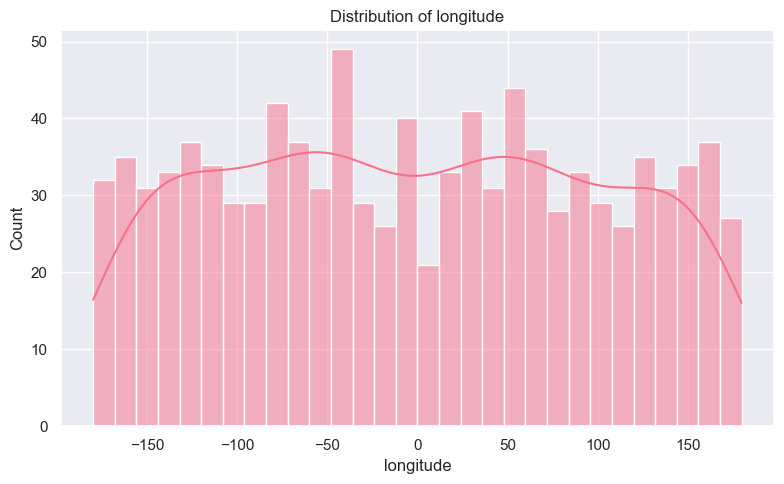

In [8]:

plt.figure(figsize=(8,5))
sns.histplot(df['longitude'], kde=True, bins=30)
plt.title('Distribution of longitude')
plt.tight_layout()
plt.savefig('charts/hist_longitude.png', dpi=150)
plt.show()


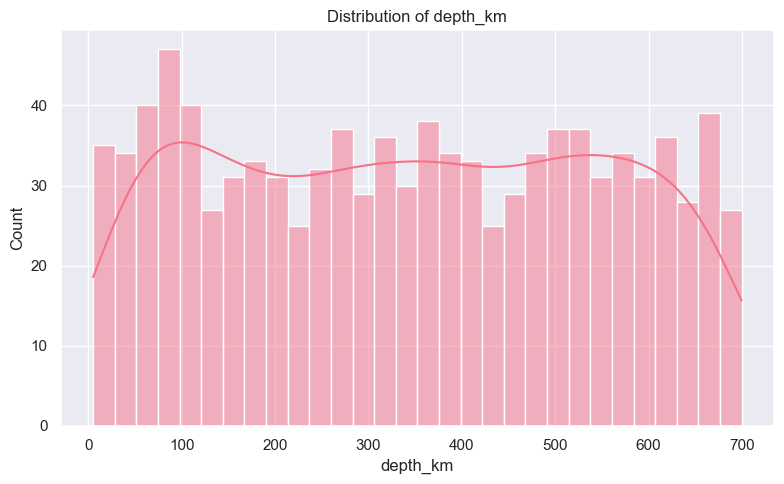

In [9]:

plt.figure(figsize=(8,5))
sns.histplot(df['depth_km'], kde=True, bins=30)
plt.title('Distribution of depth_km')
plt.tight_layout()
plt.savefig('charts/hist_depth_km.png', dpi=150)
plt.show()


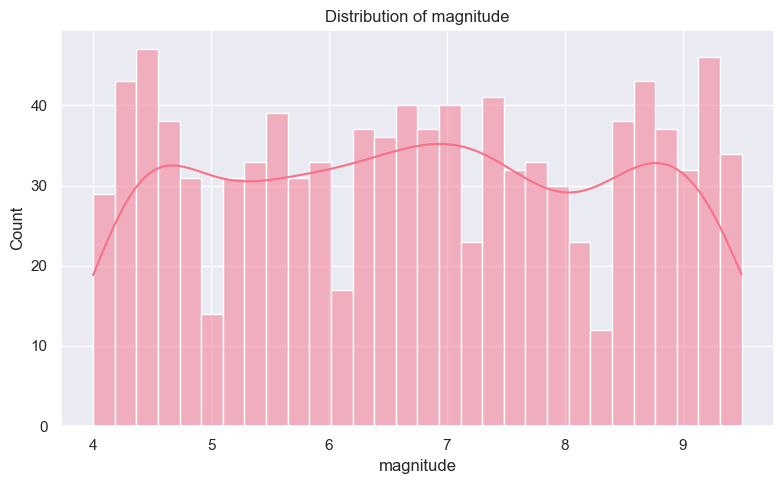

In [10]:

plt.figure(figsize=(8,5))
sns.histplot(df['magnitude'], kde=True, bins=30)
plt.title('Distribution of magnitude')
plt.tight_layout()
plt.savefig('charts/hist_magnitude.png', dpi=150)
plt.show()


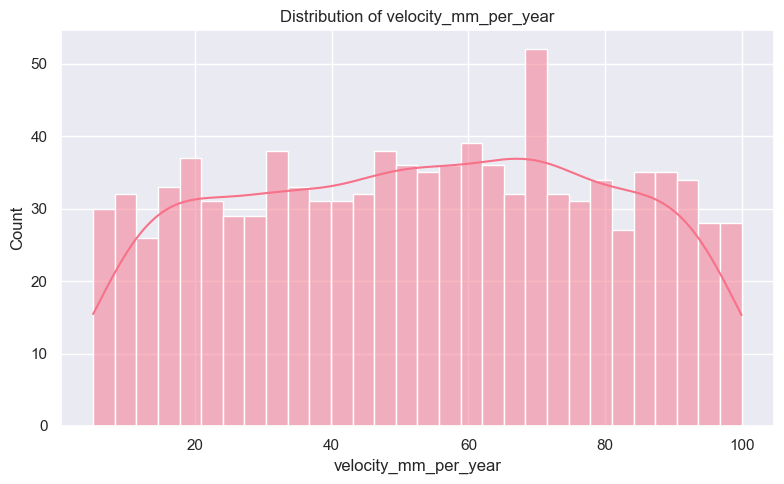

In [11]:

plt.figure(figsize=(8,5))
sns.histplot(df['velocity_mm_per_year'], kde=True, bins=30)
plt.title('Distribution of velocity_mm_per_year')
plt.tight_layout()
plt.savefig('charts/hist_velocity_mm_per_year.png', dpi=150)
plt.show()


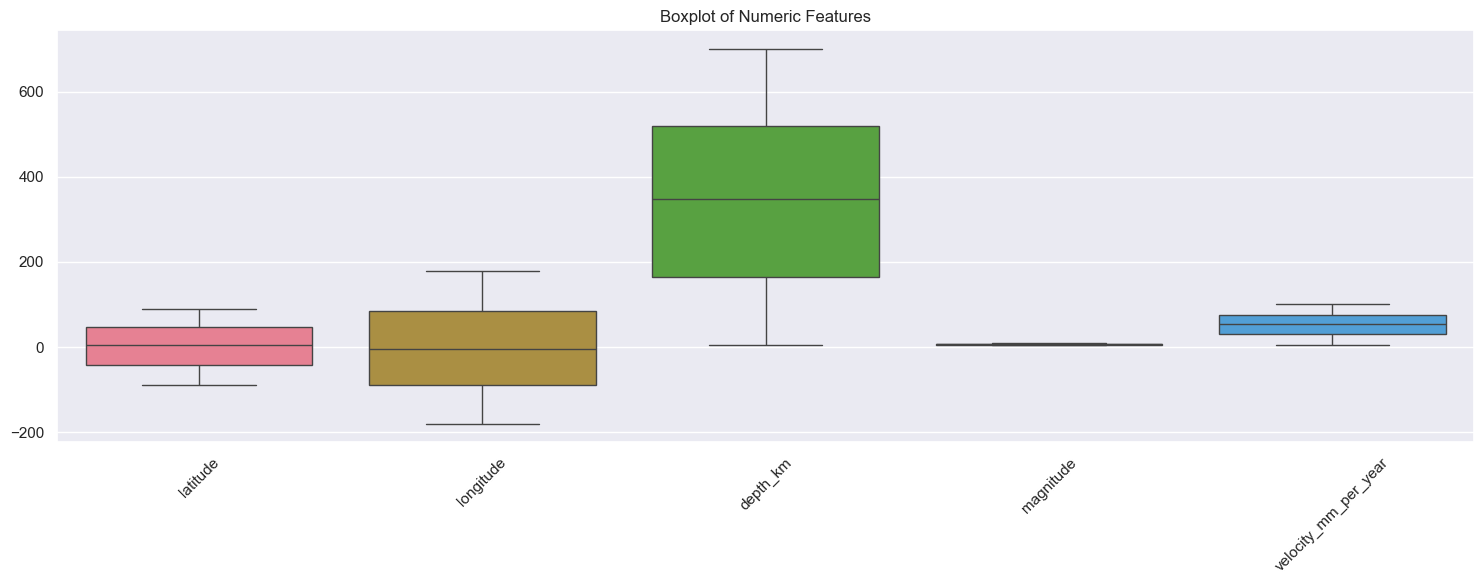

In [12]:

plt.figure(figsize=(15,6))
sns.boxplot(data=df[['latitude', 'longitude', 'depth_km', 'magnitude', 'velocity_mm_per_year']])
plt.title('Boxplot of Numeric Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('charts/boxplots.png', dpi=150)
plt.show()


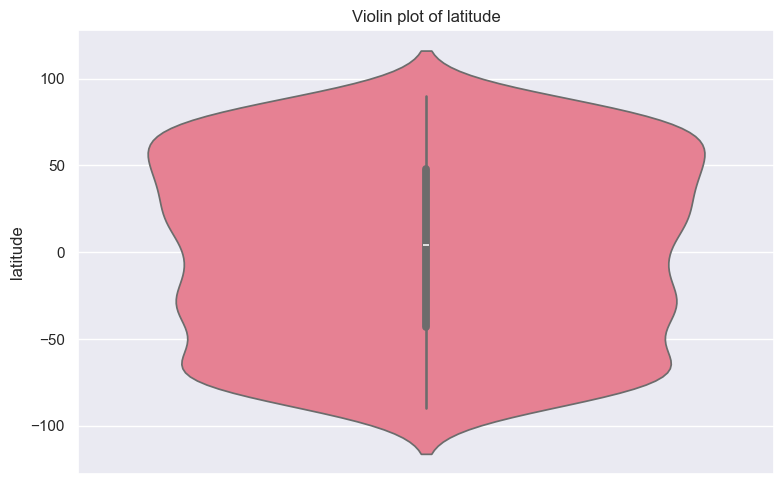

In [13]:

plt.figure(figsize=(8,5))
sns.violinplot(y=df['latitude'])
plt.title('Violin plot of latitude')
plt.tight_layout()
plt.savefig('charts/violin_latitude.png', dpi=150)
plt.show()


C:\Users\GHULAM MUSTAFA\AppData\Local\Temp\ipykernel_10520\1498009548.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='event_type', y='longitude', data=df, estimator='mean', ci=None)


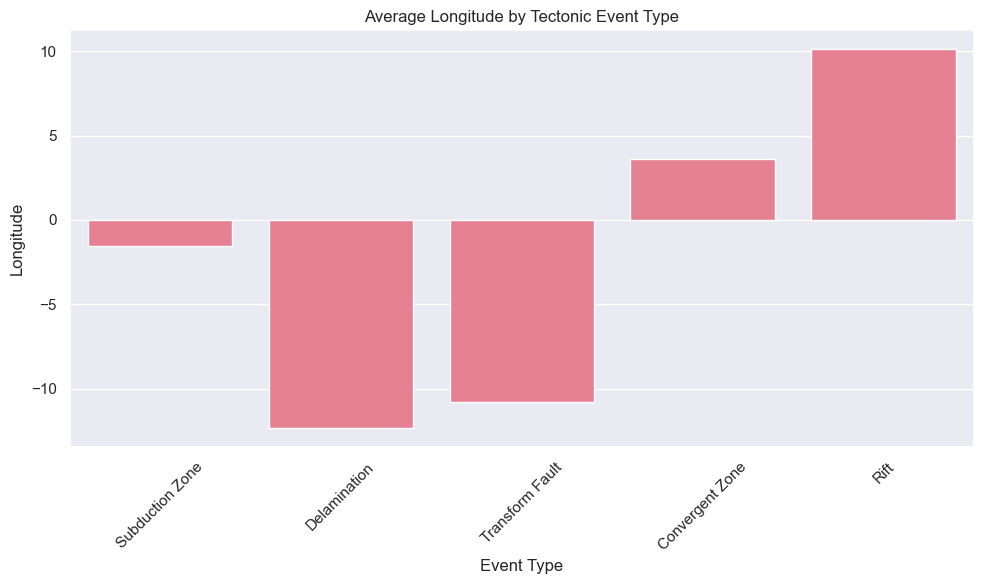

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='event_type', y='longitude', data=df, estimator='mean', ci=None)
plt.title('Average Longitude by Tectonic Event Type')
plt.ylabel('Longitude')
plt.xlabel('Event Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('charts/barplot_longitude.png', dpi=150)
plt.show()



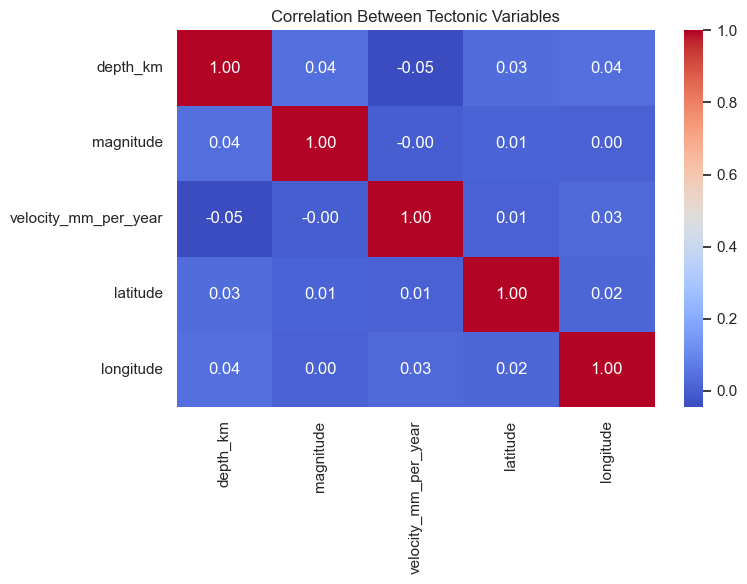

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
correlation = df[['depth_km', 'magnitude', 'velocity_mm_per_year', 'latitude', 'longitude']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Between Tectonic Variables')
plt.tight_layout()
plt.savefig('charts/correlation_heatmap.png', dpi=150)
plt.show()


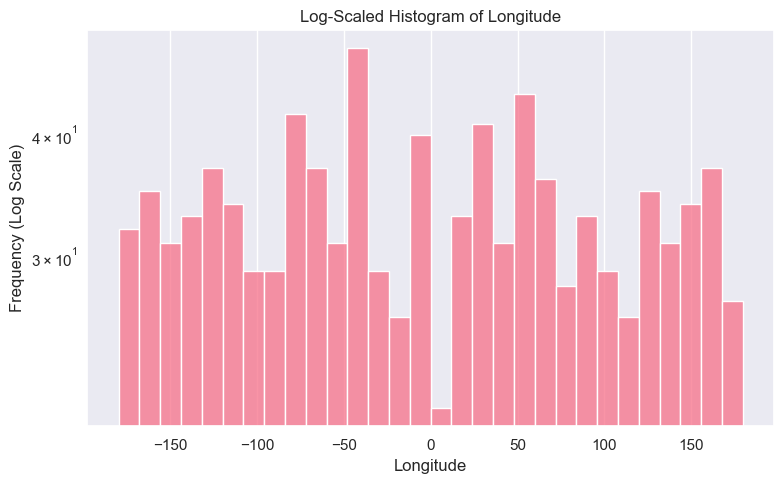

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 5))
sns.histplot(df['longitude'], bins=30)
plt.yscale('log')
plt.title('Log-Scaled Histogram of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency (Log Scale)')
plt.tight_layout()
plt.savefig('charts/logplot_longitude.png', dpi=150)
plt.show()


In [ ]:

plt.figure(figsize=(8,5))
sns.violinplot(y=df['velocity_mm_per_year'])
plt.title('Violin plot of velocity_mm_per_year')
plt.tight_layout()
plt.savefig('charts/violin_velocity_mm_per_year.png', dpi=150)
plt.show()


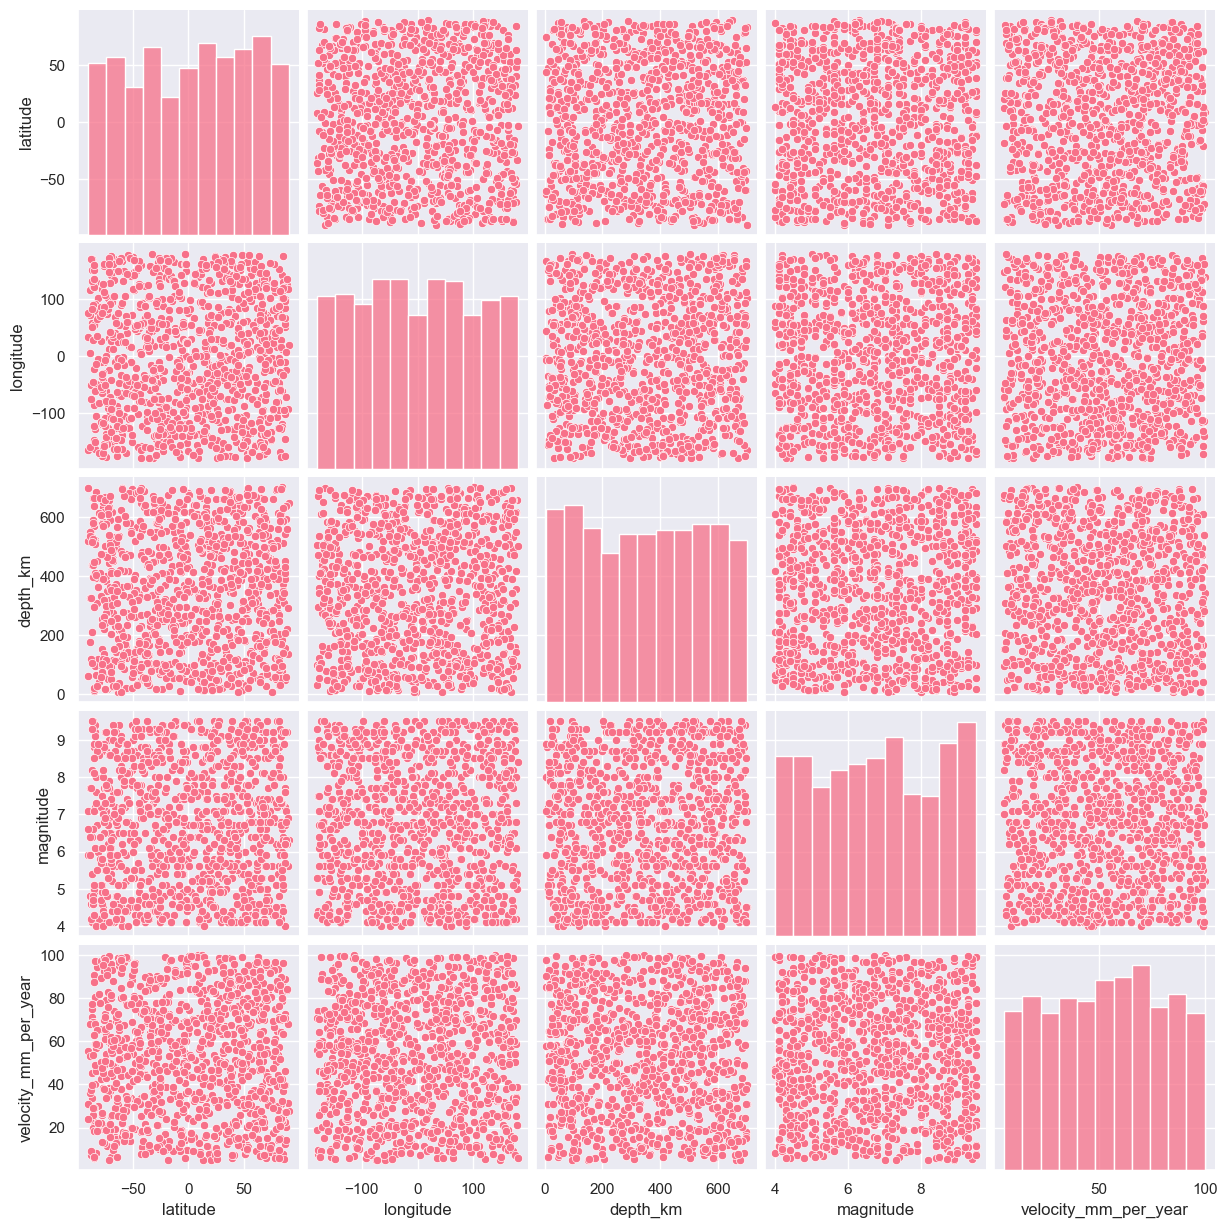

In [27]:

sns.pairplot(df[['latitude', 'longitude', 'depth_km', 'magnitude', 'velocity_mm_per_year']])
plt.savefig('charts/pairplot.png', dpi=150)
plt.show()


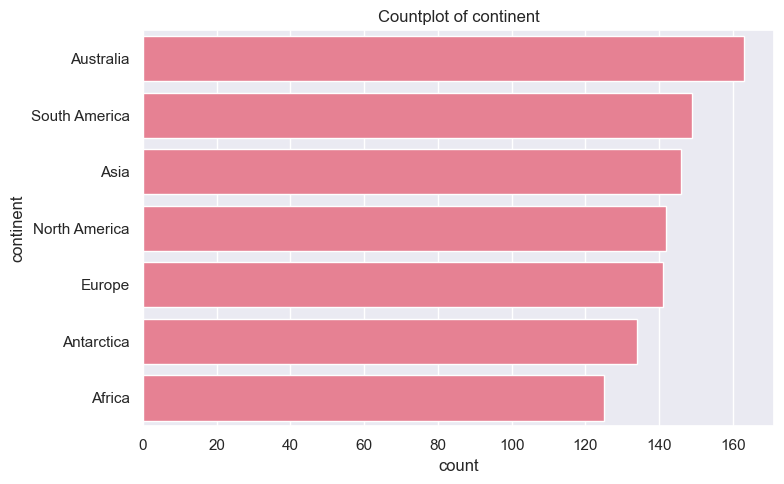

In [28]:

plt.figure(figsize=(8,5))
sns.countplot(y='continent', data=df, order=df['continent'].value_counts().index)
plt.title('Countplot of continent')
plt.tight_layout()
plt.savefig('charts/countplot_continent.png', dpi=150)
plt.show()


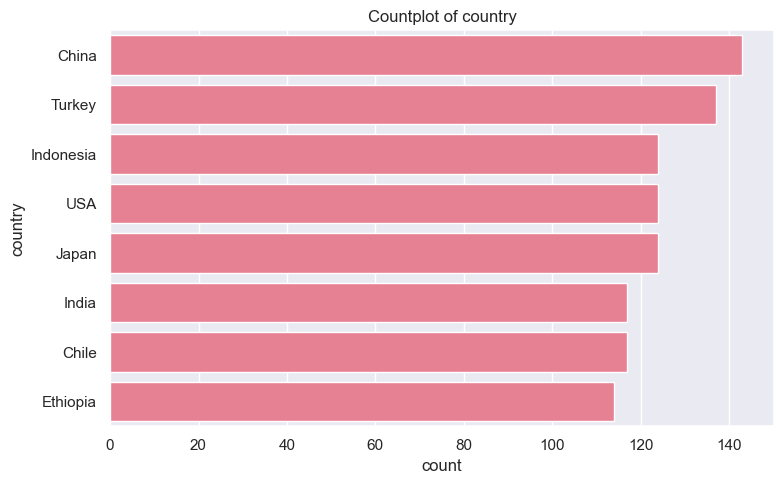

In [30]:

plt.figure(figsize=(8,5))
sns.countplot(y='country', data=df, order=df['country'].value_counts().index)
plt.title('Countplot of country')
plt.tight_layout()
plt.savefig('charts/countplot_country.png', dpi=150)
plt.show()


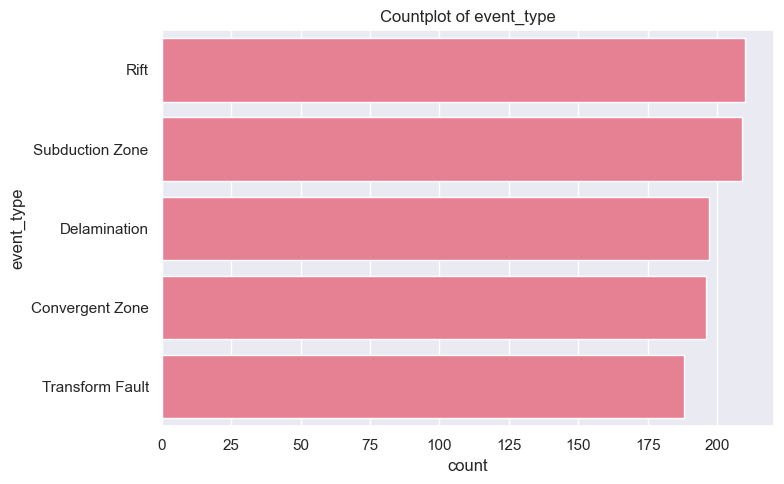

In [31]:

plt.figure(figsize=(8,5))
sns.countplot(y='event_type', data=df, order=df['event_type'].value_counts().index)
plt.title('Countplot of event_type')
plt.tight_layout()
plt.savefig('charts/countplot_event_type.png', dpi=150)
plt.show()


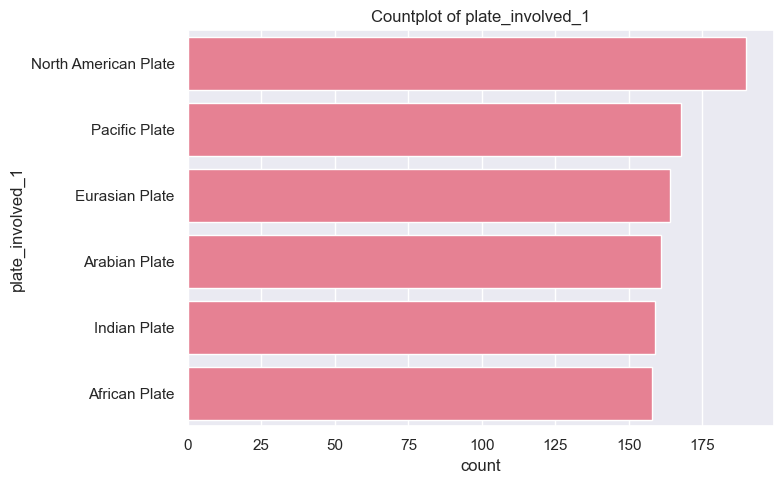

In [22]:

plt.figure(figsize=(8,5))
sns.countplot(y='plate_involved_1', data=df, order=df['plate_involved_1'].value_counts().index)
plt.title('Countplot of plate_involved_1')
plt.tight_layout()
plt.savefig('charts/countplot_plate_involved_1.png', dpi=150)
plt.show()


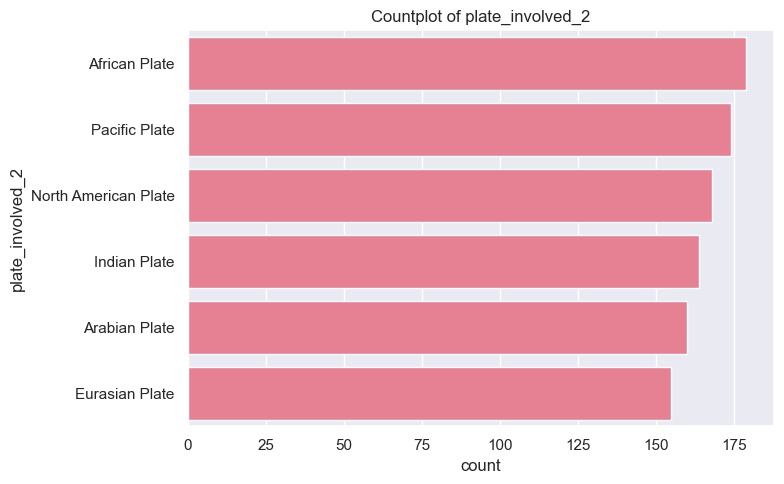

In [23]:

plt.figure(figsize=(8,5))
sns.countplot(y='plate_involved_2', data=df, order=df['plate_involved_2'].value_counts().index)
plt.title('Countplot of plate_involved_2')
plt.tight_layout()
plt.savefig('charts/countplot_plate_involved_2.png', dpi=150)
plt.show()


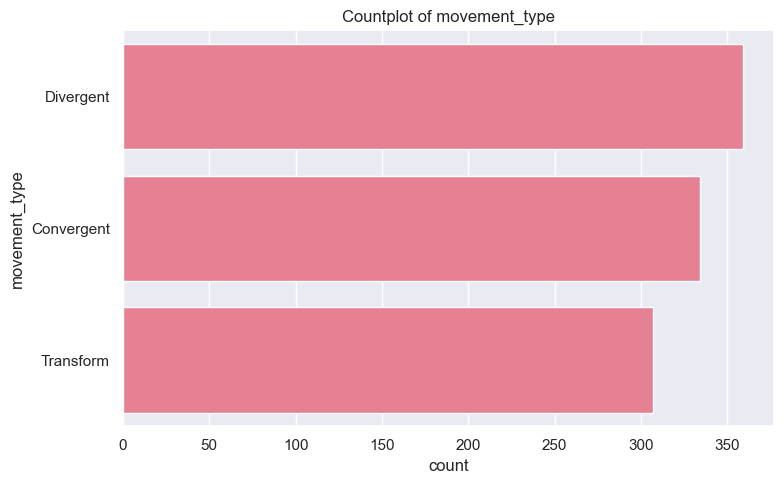

In [24]:

plt.figure(figsize=(8,5))
sns.countplot(y='movement_type', data=df, order=df['movement_type'].value_counts().index)
plt.title('Countplot of movement_type')
plt.tight_layout()
plt.savefig('charts/countplot_movement_type.png', dpi=150)
plt.show()


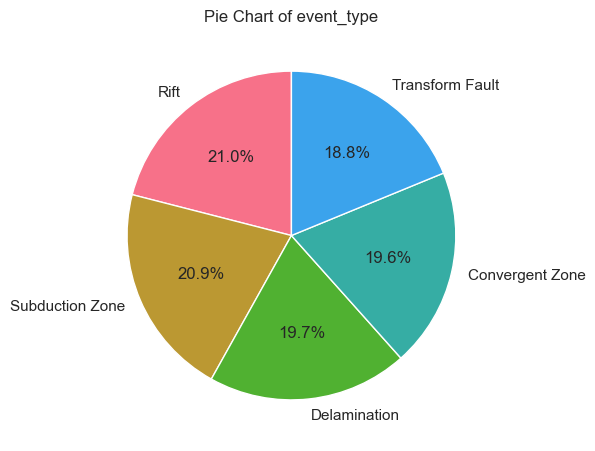

In [25]:

plt.figure(figsize=(6,6))
df['event_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of event_type')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/pie_event_type.png', dpi=150)
plt.show()


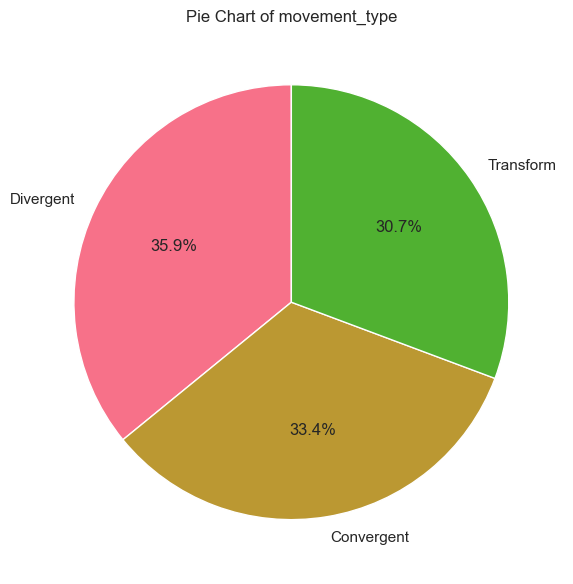

In [26]:

plt.figure(figsize=(6,6))
df['movement_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of movement_type')
plt.ylabel('')
plt.tight_layout()
plt.savefig('charts/pie_movement_type.png', dpi=150)
plt.show()
